In [26]:
# Wang, Jixin et al. “Pan-Cancer Proteomics Analysis to Identify Tumor-Enriched and Highly Expressed Cell Surface Antigens as Potential Targets for Cancer Therapeutics.”
# Molecular & cellular proteomics : MCP vol. 22,9 (2023)
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10494184/
# https://zenodo.org/records/7991979

In [27]:
# CPTAC_FragPipe_TMT_TPA_v01
# Alberto Bejarano 2024

In [28]:
# intensity-based absolute quantification (iBAQ)
# tandem mass tag (TMT) 
# total protein approach (TPA)
# TMT-TPA
# TMT-iBAQ

In [29]:
import time; start = time.time()
from datetime import datetime; print(datetime.now().strftime("%B %d, %Y %H:%M:%S"))

May 29, 2024 22:57:29


In [30]:
#!pip install pyreadr
#!pip uninstall seaborn
#!pip install seaborn==0.11.2

In [31]:
import pandas as pd
pd.set_option('display.precision', 2)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)
#        -         -        -        -         -        -         -        -        -         -
from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator
from statannot import add_stat_annotation
from openpyxl import load_workbook
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns; print(sns.__version__) # Install version 0.11.2
import numpy as np
import pyreadr
import re
#        -         -        -        -         -        -         -        -        -         -
import warnings; warnings.filterwarnings("ignore") 
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [32]:
GenesOfInterest = ["TP53", "MYC", 'ERBB2']
GenesOfInterest = ['MSLN', 'RAB5A', 'RAB5B', 'ERBB3', 'ERBB2', 'CTLA4']

In [33]:
path = './data/iBAQ/CPTAC_PAN_T_N_iBAQ_pheno.RData'
result = pyreadr.read_r(path)

In [34]:
keys = list(result.keys()); #print(f"Keys in {datafile}: {keys}")
iBAQ_pheno_df = result[keys[0]]
iBAQ_pheno_df.index.name = 'Sample'
print(iBAQ_pheno_df.index.name)
iBAQ_pheno_df = iBAQ_pheno_df.reset_index()
print(iBAQ_pheno_df.index.name)
iBAQ_pheno_df.sample(2)

Sample
None


,Sample,Tissue,ind,sample
1018,TC3L.01311,Tumor,UCEC,1019
615,TC3L.00965,Tumor,LSCC,616


In [35]:
path = './data/iBAQ/CPTAC_PAN_T_N_iBAQ.RData'
result = pyreadr.read_r(path)

In [36]:
keys = list(result.keys()); #print(f"Keys in {datafile}: {keys}")
df = result[keys[0]]
#df.fillna(0, inplace=True)

In [37]:
df.index.name = 'GeneSymbol'
print(df.index.name)
df = df.reset_index()
print(df.index.name)

GeneSymbol
None


In [38]:
df.sample(2)

,GeneSymbol,T05BR044,T11BR031,T01BR020,T06BR006,T11BR056,T03BR010,T11BR023,T03BR006,T11BR003,T01BR033,T11BR017,T21BR002,T09BR007,T20BR008,T18BR006,T11BR006,T18BR019,T22BR005,T18BR016,T18BR003,T14BR008,T11BR011,T05BR016,TCPT001846_0005,T11BR038,T11BR019,T18BR007,T22BR006,T18BR010,T14BR005,T01BR018,T01BR030,T11BR078,T11BR073,T11BR076,T05BR038,T03BR002,T11BR018,T11BR010,T11BR042,T11BR024,T01BR042,T11BR031.1,T01BR015,T03BR005,TCPT000814_0004,T05BR026,T11BR053.1,T18BR017,T11BR016,T01BR031,T15BR003,T20BR001,T05BR003,T05BR029,T20BR002,T21BR001,T03BR013,T11BR036.2,T03BR011,T11BR014,T11BR055,T05BR001,T18BR002,T13BR009,T11BR049,T11BR015,T06BR014,T06BR003,T01BR025,T01BR027,T11BR040,T11BR058,T16BR012,T11BR004,T20BR007,T14BR014,T20BR005,T11BR044,T11BR057,T11BR047,T11BR075,T14BR005.1,T11BR080,T01BR001,T11BR022,T11BR025,T11BR053,T11BR036.1,T11BR050,T21BR010,T01BR009,T11BR036,T05BR005,T09BR005,T01BR026,T11BR059,T11BR032,T01BR010,...,NC3L.02899,NC3N.01997,NC3N.00517,NC3L.00277,NC3L.04848,NC3L.01031,NC3N.03884,NC3N.00518,NC3N.00249,NC3L.00640,NC3L.02115,NC3L.04479,NC3L.02463,NC3L.02809,NC3L.01598,NC3L.01053,NC3N.02573,NC3N.03853,NC3L.03632,NC3N.02589,NC3N.02592,NC3L.00401,NC3N.00514,NC3L.01036,NC3L.03628,NC3N.00512,NC3L.03350,NC3L.00102,NC3L.03371,NC3L.00819,NC3N.03061,NC3N.03839,NC3L.04475,NC3N.03173,NC3L.00881,NC3L.00928,NC3L.01052,NC3L.01037,NC3L.01051,NC3L.03630,NC3L.03639,NC3L.02610,NC3N.02295,NC3N.00957,NC3N.01900,NC3N.04282,NC3N.00198,NC3L.00189,NC3N.02585,NC3L.03356,NC3L.04495,NC3N.03211,NC3N.03069,NC3L.03388,NC3L.04072,NC3L.01637,NC3N.04119,NC3L.01689,NC3N.03426,NC3L.01453,NC3N.00709,NC3N.00513,NC3L.01054,NC3N.02944,NC3L.04473,NC3L.02890,NC3N.02768,NC3L.03743,NC3L.01971,NC3L.01246,NC3L.00963,NC3L.00771,NC3N.00866,NC3L.01282,NC3N.01211,NC3L.00947,NC3N.00729,NC3L.01304,NC3L.00601,NC3N.01346,NC3L.01311,NC3N.00858,NC3N.00383,NC3L.00006,NC3L.01256,NC3L.01257,NC3L.01249,NC3L.00586,NC3L.00770,NC3N.00333,NC3L.00563,NC3L.01307,NC3N.00200,NC3L.00769,NC3L.00361,NC3L.01252,NC3L.00932,NC3L.00605,NC3L.01744,NC3L.00930
3247,HTT,326562.16,3.79e+05,2.89e+05,140718.99,399993.16,328403.19,4.87e+05,3.68e+05,5.37e+05,238787.93,189271.96,398471.79,277676.35,185018.52,4.06e+05,177614.14,412025.19,4.73e+05,328823.60,4.96e+05,173375.83,447508.42,3.51e+05,308455.80,3.93e+05,399529.75,319027.25,5.75e+05,235492.42,345555.42,2.28e+05,306111.50,3.72e+05,4.11e+05,307557.69,309298.19,157635.69,205939.47,470190.63,3.99e+05,3.51e+05,2.97e+05,380366.61,2.95e+05,140302.34,2.87e+05,4.70e+05,3.90e+05,4.55e+05,4.55e+05,3.04e+05,226683.13,281733.78,281328.52,2.15e+05,2.28e+05,4.21e+05,255971.24,4.73e+05,4.03e+05,294990.33,290132.94,3.27e+05,223254.83,3.52e+05,2.94e+05,3.44e+05,303441.58,4.24e+05,3.90e+05,3.06e+05,317875.46,328850.57,2.44e+05,306016.17,3.34e+05,273346.1,3.59e+05,4.54e+05,4.21e+05,344068.23,304654.99,325737.29,3.76e+05,190587.85,300237.15,3.82e+05,3.92e+05,4.56e+05,235921.49,344605.97,2.81e+05,4.61e+05,317710.64,422962.92,182052.33,4.43e+05,320728.09,370749.11,...,548125.06,286638.99,445785.57,196856.9,775633.32,281213.22,301576.67,515223.50,236873.16,459430.9,162546.93,464633.12,7.84e+05,417838.22,323672.83,3.12e+05,282351.73,7.52e+05,233015.03,495469.78,465733.91,330138.36,617058.34,335703.58,7.51e+05,400831.75,532635.06,352382.62,698730.65,4.04e+05,478338.61,528390.39,9.97e+05,5.61e+05,217131.79,302129.22,350721.50,363694.07,252441.58,471831.16,673356.67,321678.15,598602.75,296323.30,4.12e+05,3.52e+05,305036.23,372514.68,461576.89,455301.58,362648.05,367798.94,422678.06,258176.44,638217.19,192358.70,540908.98,7.83e+05,750401.08,579986.88,307684.47,382531.62,168834.66,477712.94,375486.85,6.24e+05,426930.67,9.42e+05,360402.44,407541.61,479276.43,6.06e+05,314616.38,387733.61,357112.91,483318.70,255491.03,356085.84,377642.63,320714.62,340304.89,227186.33,199925.02,318206.98,286384.53,429333.09,326159.48,345347.7,106734.62,298092.55,204656.58,308570.56,211905.15,355873.17,297751.80,317332.97,432637.51,466417.09,185472.52,284630.70
4095,MCM6,706722.04,1.07e+06,2.

In [39]:
df_filtered = df[df["GeneSymbol"].isin(GenesOfInterest)]
df_filtered.sample()

,GeneSymbol,T05BR044,T11BR031,T01BR020,T06BR006,T11BR056,T03BR010,T11BR023,T03BR006,T11BR003,T01BR033,T11BR017,T21BR002,T09BR007,T20BR008,T18BR006,T11BR006,T18BR019,T22BR005,T18BR016,T18BR003,T14BR008,T11BR011,T05BR016,TCPT001846_0005,T11BR038,T11BR019,T18BR007,T22BR006,T18BR010,T14BR005,T01BR018,T01BR030,T11BR078,T11BR073,T11BR076,T05BR038,T03BR002,T11BR018,T11BR010,T11BR042,T11BR024,T01BR042,T11BR031.1,T01BR015,T03BR005,TCPT000814_0004,T05BR026,T11BR053.1,T18BR017,T11BR016,T01BR031,T15BR003,T20BR001,T05BR003,T05BR029,T20BR002,T21BR001,T03BR013,T11BR036.2,T03BR011,T11BR014,T11BR055,T05BR001,T18BR002,T13BR009,T11BR049,T11BR015,T06BR014,T06BR003,T01BR025,T01BR027,T11BR040,T11BR058,T16BR012,T11BR004,T20BR007,T14BR014,T20BR005,T11BR044,T11BR057,T11BR047,T11BR075,T14BR005.1,T11BR080,T01BR001,T11BR022,T11BR025,T11BR053,T11BR036.1,T11BR050,T21BR010,T01BR009,T11BR036,T05BR005,T09BR005,T01BR026,T11BR059,T11BR032,T01BR010,...,NC3L.02899,NC3N.01997,NC3N.00517,NC3L.00277,NC3L.04848,NC3L.01031,NC3N.03884,NC3N.00518,NC3N.00249,NC3L.00640,NC3L.02115,NC3L.04479,NC3L.02463,NC3L.02809,NC3L.01598,NC3L.01053,NC3N.02573,NC3N.03853,NC3L.03632,NC3N.02589,NC3N.02592,NC3L.00401,NC3N.00514,NC3L.01036,NC3L.03628,NC3N.00512,NC3L.03350,NC3L.00102,NC3L.03371,NC3L.00819,NC3N.03061,NC3N.03839,NC3L.04475,NC3N.03173,NC3L.00881,NC3L.00928,NC3L.01052,NC3L.01037,NC3L.01051,NC3L.03630,NC3L.03639,NC3L.02610,NC3N.02295,NC3N.00957,NC3N.01900,NC3N.04282,NC3N.00198,NC3L.00189,NC3N.02585,NC3L.03356,NC3L.04495,NC3N.03211,NC3N.03069,NC3L.03388,NC3L.04072,NC3L.01637,NC3N.04119,NC3L.01689,NC3N.03426,NC3L.01453,NC3N.00709,NC3N.00513,NC3L.01054,NC3N.02944,NC3L.04473,NC3L.02890,NC3N.02768,NC3L.03743,NC3L.01971,NC3L.01246,NC3L.00963,NC3L.00771,NC3N.00866,NC3L.01282,NC3N.01211,NC3L.00947,NC3N.00729,NC3L.01304,NC3L.00601,NC3N.01346,NC3L.01311,NC3N.00858,NC3N.00383,NC3L.00006,NC3L.01256,NC3L.01257,NC3L.01249,NC3L.00586,NC3L.00770,NC3N.00333,NC3L.00563,NC3L.01307,NC3N.00200,NC3L.00769,NC3L.00361,NC3L.01252,NC3L.00932,NC3L.00605,NC3L.01744,NC3L.00930
7649,TP53,301604.67,125145.57,292396.17,142104.2,362749.41,288386.17,860275.87,1.73e+06,312199.61,300006.22,122301.4,315900.23,194392.52,135937.68,177467.49,141340.88,468913.03,323196.06,103298.97,319102.0,214755.86,299479.66,298362.57,375901.93,170157.84,297829.39,184803.4,232860.11,172566.74,162956.85,801752.04,359623.6,145121.05,484538.39,127046.31,172907.56,79821.64,174720.35,244524.71,406800.01,3.61e+06,243006.94,262754.77,305372.49,169472.77,1.14e+06,222829.53,503916.48,212337.51,279323.81,3.61e+06,332325.16,137217.7,238617.63,128647.92,130353.44,509146.91,148844.06,357038.82,273148.72,207474.31,236883.16,779115.99,245887.99,159910.38,186099.08,142634.98,125153.03,217916.68,204248.53,2.61e+06,124179.33,441574.72,164516.14,343091.19,741071.23,159357.31,359111.97,454085.89,188785.57,157122.48,319474.44,195434.24,206885.58,713150.33,227903.89,201464.35,490071.07,228388.4,193790.35,190308.51,1.21e+06,229038.2,137534.61,421587.86,208976.62,265689.64,266474.93,301411.81,...,68787.99,24430.03,98838.66,42525.23,147530.38,69431.76,70776.98,NaN,NaN,67059.92,NaN,73200.69,123006.98,83206.21,88956.79,197501.96,NaN,171547.5,49835.72,94785.62,70074.89,NaN,123190.83,NaN,135645.0,82471.91,NaN,NaN,NaN,164469.84,NaN,NaN,NaN,84727.68,107222.21,78315.26,NaN,NaN,103619.47,NaN,102499.12,71812.7,NaN,124108.88,169517.56,142392.87,NaN,NaN,110540.32,NaN,63514.95,132179.55,81639.13,NaN,NaN,NaN,85284.61,NaN,107647.65,104342.52,NaN,192803.49,NaN,65129.74,NaN,NaN,NaN,191643.96,73864.47,NaN,NaN,110124.3,NaN,NaN,83862.71,NaN,59302.22,NaN,55069.65,121167.3,107042.13,NaN,36937.52,68471.17,118090.12,NaN,54532.54,51623.48,28146.2,63659.56,68365.51,NaN,28946.32,84703.45,50091.99,NaN,NaN,NaN,69008.51,NaN


In [40]:
df_narrow = pd.melt(df_filtered.reset_index(), id_vars=['GeneSymbol'], var_name='Sample', value_name='iBAQ')
df_narrow.sample()

,GeneSymbol,Sample,iBAQ
279,TP53,TC3N.01178,NaN


In [41]:
col_order = ['GeneSymbol', 'Sample', 'TumorType', 'TissueType', 'iBAQ', 'log10_iBAQ']

In [42]:
iBAQ_ProtExpression_df = pd.merge(df_narrow, iBAQ_pheno_df, on='Sample')
iBAQ_ProtExpression_df.rename(columns={'ind':'TumorType', 'Tissue':'TissueType'}, inplace=True)
iBAQ_ProtExpression_df['log10_iBAQ'] = iBAQ_ProtExpression_df['iBAQ'].apply(lambda x: np.log(x+1))
iBAQ_ProtExpression_df = iBAQ_ProtExpression_df[col_order]
iBAQ_ProtExpression_df.sample(5)

,GeneSymbol,Sample,TumorType,TissueType,iBAQ,log10_iBAQ
421,TP53,TC3N.00577,ccRCC,Tumor,NaN,NaN
3216,ERBB2,NC3N.02573,PDA,Normal,1.14e+05,11.64
2368,ERBB2,NC3N.00953,ccRCC,Normal,1.31e+06,14.09
162,ERBB2,T11BR075,BRCA,Tumor,1.78e+06,14.39
2123,TP53,TC3N.00848,UCEC,Tumor,1.64e+05,12.01


In [43]:
%%time
for gene in GenesOfInterest:
    data = iBAQ_ProtExpression_df[iBAQ_ProtExpression_df['GeneSymbol'] == gene]
    sample_counts = data.groupby(['GeneSymbol', 'TumorType', 'TissueType']).size().reset_index(name='SampleCount')
    sample_counts = sample_counts.sort_values(by=['TumorType', 'SampleCount', 'TissueType'], ascending=[True, False, True])
    print(sample_counts)

   GeneSymbol TumorType TissueType  SampleCount
1        TP53      BRCA      Tumor          133
0        TP53      BRCA     Normal           18
2        TP53      COAD     Normal          100
3        TP53      COAD      Tumor           97
5        TP53       GBM      Tumor          100
4        TP53       GBM     Normal           10
7        TP53     HNSCC      Tumor          108
6        TP53     HNSCC     Normal           58
8        TP53      LSCC     Normal          102
9        TP53      LSCC      Tumor           88
11       TP53      LUAD      Tumor          113
10       TP53      LUAD     Normal          102
13       TP53        OV      Tumor           89
12       TP53        OV     Normal           19
15       TP53       PDA      Tumor          145
14       TP53       PDA     Normal           85
17       TP53      UCEC      Tumor          100
16       TP53      UCEC     Normal           31
19       TP53     ccRCC      Tumor          110
18       TP53     ccRCC     Normal      

In [44]:
iBAQ_ProtExpression_df.dtypes

GeneSymbol     object
Sample         object
TumorType      object
TissueType     object
iBAQ          float64
log10_iBAQ    float64
dtype: object

In [45]:
print(len(iBAQ_ProtExpression_df))
#prot_exp_df = prot_exp_df.head(200)
print(len(iBAQ_ProtExpression_df))

3384
3384


In [46]:
palette = sns.color_palette("pastel")

In [47]:
hue_order = ["Normal", "Tumor"]

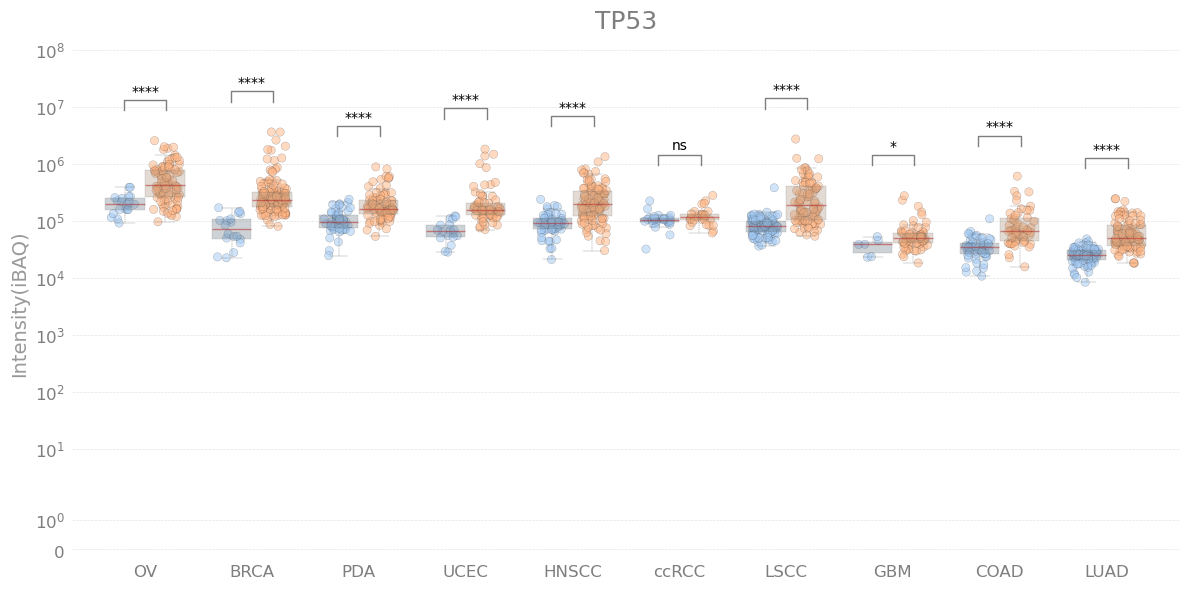

An unexpected error occurred with MYC: Missing hue value(s) `"Normal", "Tumor"` in TissueType (specified in `hue_order`)


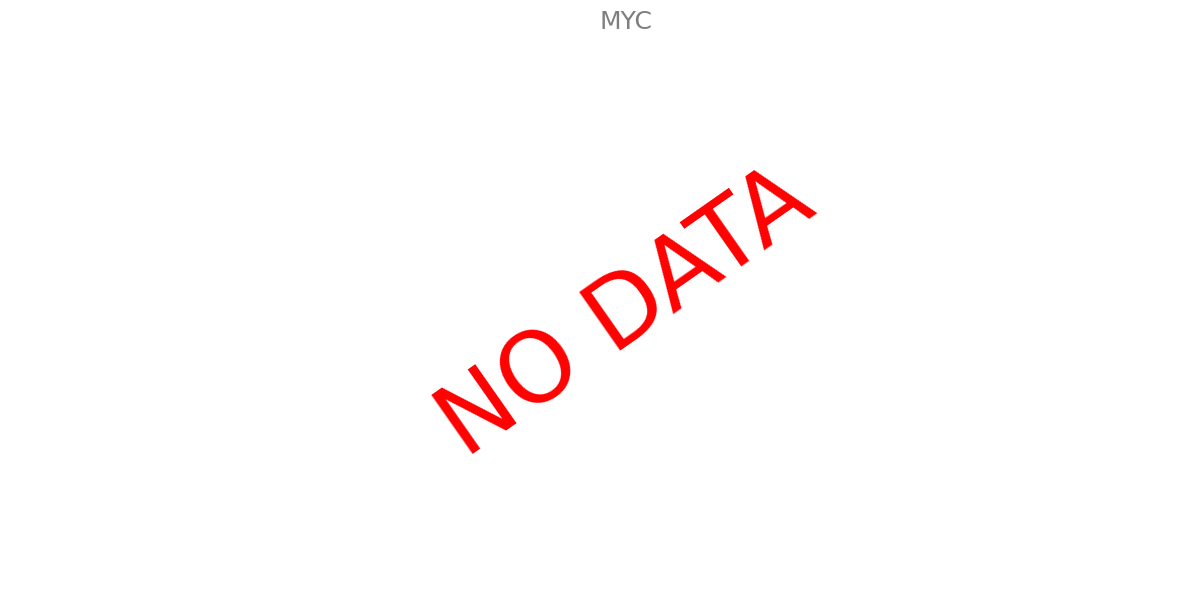

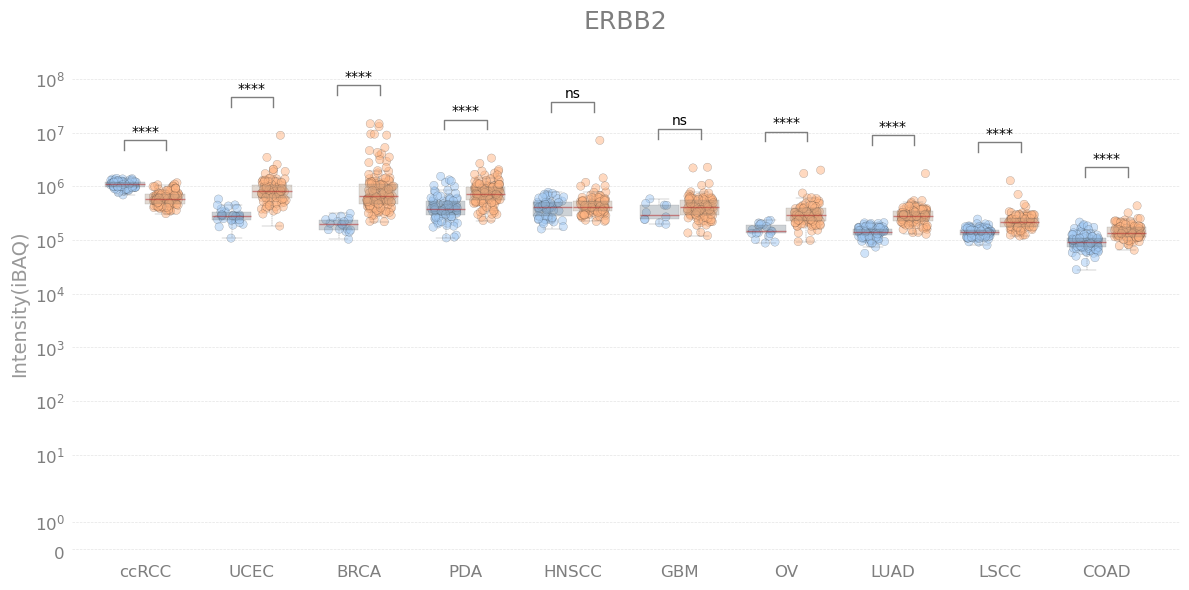

CPU times: total: 11.8 s
Wall time: 11.8 s


In [48]:
%%time
for gene in GenesOfInterest:
    fig, ax = plt.subplots(figsize=(12, 6)); plt.subplots_adjust(wspace=0.02, hspace=0.01)
    sns.plotting_context("notebook", font_scale = 2)
    #        -         -        -        -         -        -         -        -        -         -        -        -         -    
    data = iBAQ_ProtExpression_df[iBAQ_ProtExpression_df['GeneSymbol'] == gene]
    data.dropna(subset=['iBAQ'], inplace=True)
    #        -         -        -        -         -        -         -        -        -         -        -        -         -
    unique_cancer_types = data['TumorType'].unique(); pairs = []
    for cancer_type in unique_cancer_types:
        unique_labels = data[data['TumorType'] == cancer_type]['TissueType'].unique(); #print(cancer_type, unique_labels)
        if "Normal" in unique_labels and "Tumor" in unique_labels:
            pairs.append(((cancer_type, "Normal"), (cancer_type, "Tumor"))); # print(pairs)
    #        -         -        -        -         -        -         -        -        -         -        -        -         -
    median_df = data.groupby(['TumorType'])['iBAQ'].median().sort_values(ascending=False).reset_index()
    order = median_df.TumorType.tolist()
    #        -         -        -        -         -        -         -        -        -         -        -        -         -
    data=data; x="TumorType"; y = "iBAQ"; hue='TissueType'; hue_order=hue_order
    #        -         -        -        -         -        -         -        -        -         -        -        -         -   
    annot_kws1 = {'pairs':pairs, 'data':data, 'x':x, 'y':y, 'order':order, 'hue':hue, 'hue_order':hue_order}
    annot_params = {"test":"Mann-Whitney", "line_width":1, "color":"#7E7E7E", "text_format":"star", 'loc':'inside'}
    #        -         -        -        -         -        -         -        -        -         -        -        -         -   
    str_kws = {'s':6, 'jitter':.25, 'alpha':0.5, 'dodge':True, 'linewidth':0.2,'edgecolor':'#1E1E1E','palette':palette,
               'order':order, 'hue':hue, 'hue_order':hue_order}
    box_kws = {'linewidth':0.5, 'width':0.75, 'dodge':True, 'showcaps':True, 'whis':1.5, 'fliersize':0, 'saturation':0.20, 
               'order':order, 'hue_order':hue_order}
    mprops=dict(linestyle='-', linewidth=1, color="firebrick", alpha=0.5); cprops=dict(linestyle="-", alpha=.5, linewidth=.3);
    bprops=dict(linestyle="-", alpha=.3, linewidth=.3); wprops=dict(linestyle="--", linewidth=.3, color="#7E7E7E");
    #        -         -        -        -         -        -         -        -        -         -        -        -         -   
    plt.gca().set_yscale('symlog'); plt.ylim(-0.2, 1E8) 
    g = sns.stripplot(data=data, x=x, y=y, zorder=0, **str_kws, ax=ax)   
    g = sns.boxplot(data=data,x=x, y=y, hue=hue, medianprops=mprops, capprops=cprops, boxprops=bprops, whiskerprops=wprops, **box_kws, zorder=1, ax=ax)
    #        -         -        -        -         -        -         -        -        -         -        -        -         -     
    try:
        ax, test_results = Annotator(ax, **annot_kws1).reset_configuration().configure(**annot_params, verbose=0).apply_and_annotate()
    except Exception as e:
        print(f"An unexpected error occurred with {gene}: {e}")
        textkws = {'weight':500, 'va':'center', 'alpha':1, 'rotation':35,}; axs = ax.transAxes
        bboxkws = {'facecolor':'white', 'edgecolor':'#FF0000', 'linewidth': 5, 'boxstyle':'round','pad':10}
        ax.text(0.5, 0.5, 'NO DATA', fontsize=70, ha='center', color='#FF0000', transform=axs, bbox=bboxkws, **textkws)
    #        -         -        -        -         -        -         -        -        -         -        -        -         -    
    ax.set_title(gene, fontsize=18, pad=15, color='#7E7E7E')
    axlabelkws = {'fontsize':14, 'color':'#7E7E7E', 'alpha':0.8, 'labelpad':4}
    plt.xlabel("", **axlabelkws); plt.ylabel("Intensity(iBAQ)", **axlabelkws)
    #        -         -        -        -         -        -         -        -        -         -        -        -         -  
    plt.rcParams['xtick.bottom'] = False; plt.rcParams['ytick.left'] = False
    sns.despine(left=True, bottom=True)    
    ax.tick_params(axis="x", which='major', colors="#cfcfcf", length=0, width=0, pad=5)
    ax.tick_params(axis='y', which='major', colors="#cfcfcf", length=0, width=0, pad=5)
    plt.setp(ax.xaxis.get_majorticklabels(), fontsize=12, color="#7E7E7E", rotation=0, rotation_mode='default')
    plt.setp(ax.yaxis.get_majorticklabels(), fontsize=12, color="#7E7E7E", rotation=0, rotation_mode='default')
    #          -          -          -          -          -          -          -          -          -          -          - 
    kws_lines = {"ls":"--", "alpha":0.2, "linewidth":0.5, 'color':"#7E7E7E"}; exponents = range(-1, 9)
    for exp in exponents:
        y_value = 10 ** exp; plt.axhline(y=y_value, **kws_lines)
    #          -          -          -          -          -          -          -          -          -          -          - 
    plt.legend([],[],frameon=False)
    plt.tight_layout();
    plt.show(); #plt.close()
    #plt.savefig("tcga.png", format="png", bbox_inches="tight", dpi=300)

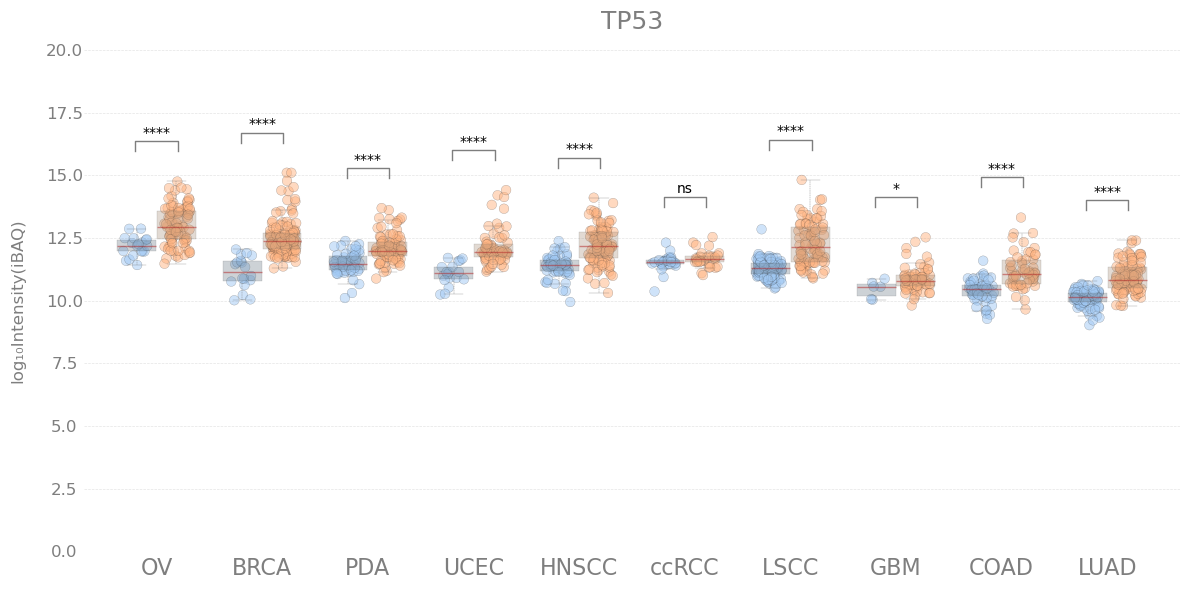

An unexpected error occurred with MYC: Missing hue value(s) `"Normal", "Tumor"` in TissueType (specified in `hue_order`)


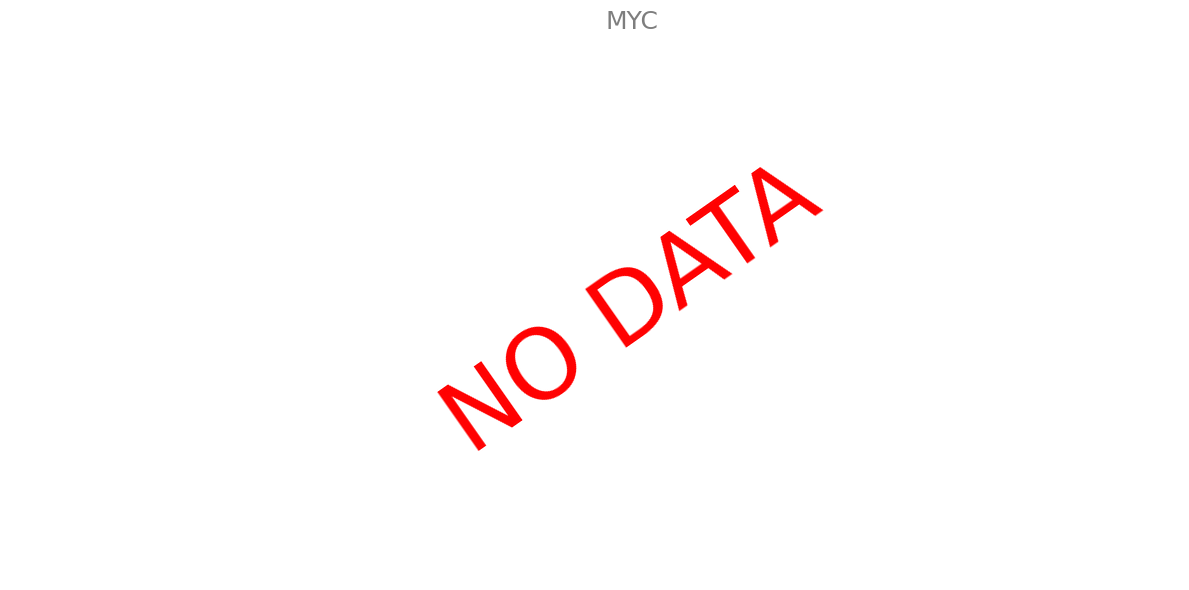

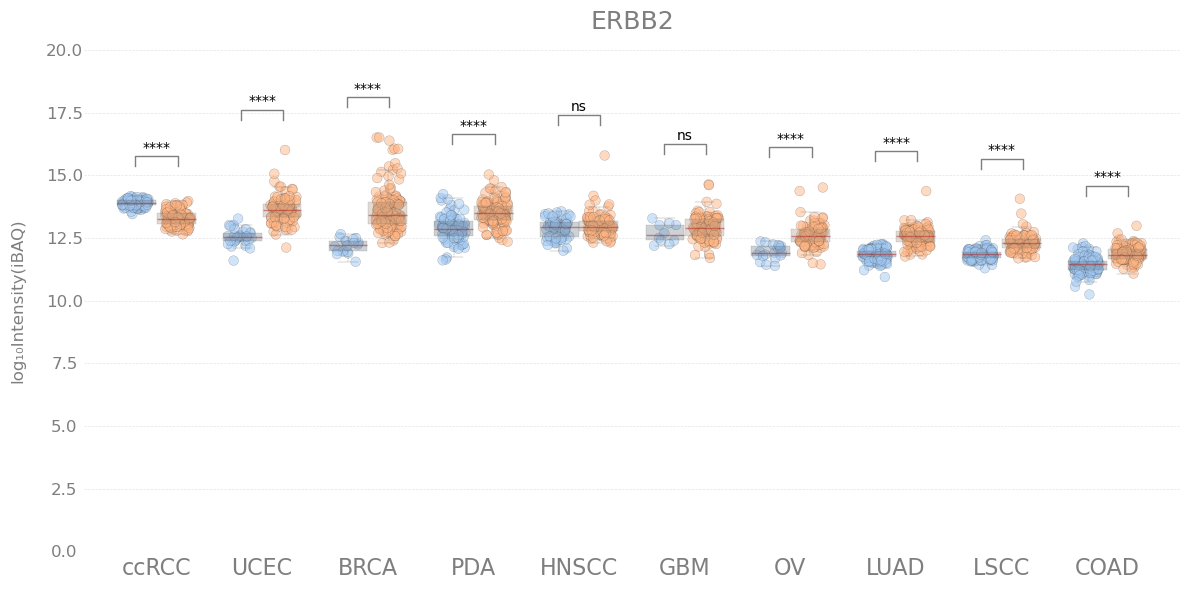

CPU times: total: 8.56 s
Wall time: 8.6 s


In [49]:
%%time
for gene in GenesOfInterest:
    fig, ax = plt.subplots(figsize=(12, 6)); plt.subplots_adjust(wspace=0.02, hspace=0.01)
    sns.plotting_context("notebook", font_scale = 2)
    #        -         -        -        -         -        -         -        -        -         -        -        -         -    
    data = iBAQ_ProtExpression_df[iBAQ_ProtExpression_df['GeneSymbol'] == gene]
    data.dropna(subset = ['log10_iBAQ'], inplace=True)
    #        -         -        -        -         -        -         -        -        -         -        -        -         -
    unique_cancer_types = data['TumorType'].unique(); pairs = []
    for cancer_type in unique_cancer_types:
        unique_labels = data[data['TumorType'] == cancer_type]['TissueType'].unique(); #print(cancer_type, unique_labels)
        if "Normal" in unique_labels and "Tumor" in unique_labels:
            pairs.append(((cancer_type, "Normal"), (cancer_type, "Tumor"))); # print(pairs)
    #        -         -        -        -         -        -         -        -        -         -        -        -         -
    median_df = data.groupby(['TumorType'])['log10_iBAQ'].median().sort_values(ascending=False).reset_index()
    order = median_df.TumorType.tolist()
    #        -         -        -        -         -        -         -        -        -         -        -        -         -
    data=data; x="TumorType"; y = "log10_iBAQ"; hue='TissueType'; hue_order=hue_order
    #        -         -        -        -         -        -         -        -        -         -        -        -         -   
    annot_kws1 = {'pairs':pairs, 'data':data, 'x':x, 'y':y, 'order':order, 'hue':hue, 'hue_order':hue_order}
    annot_params = {"test":"Mann-Whitney", "line_width":1, "color":"#7E7E7E", "text_format":"star", 'loc':'inside'}
    #        -         -        -        -         -        -         -        -        -         -        -        -         -   
    str_kws = {'s':7, 'jitter':.25, 'alpha':0.5, 'dodge':True, 'linewidth':0.2,'edgecolor':'#1E1E1E','palette':palette,
               'order':order, 'hue':hue, 'hue_order':hue_order}
    box_kws = {'linewidth':0.5, 'width':0.75, 'dodge':True, 'showcaps':True, 'whis':1.5, 'fliersize':0, 'saturation':0.20, 
               'order':order, 'hue_order':hue_order}
    mprops=dict(linestyle='-', linewidth=1, color="firebrick", alpha=0.5); cprops=dict(linestyle="-", alpha=.5, linewidth=.3);
    bprops=dict(linestyle="-", alpha=.3, linewidth=.3); wprops=dict(linestyle="--", linewidth=.3, color="#7E7E7E");
    #        -         -        -        -         -        -         -        -        -         -        -        -         -   
    plt.gca().set_yscale('linear'); plt.ylim(0, 20) 
    g = sns.stripplot(data=data, x=x, y=y, zorder=0, **str_kws, ax=ax)   
    g = sns.boxplot(data=data,x=x, y=y, hue=hue, medianprops=mprops, capprops=cprops, boxprops=bprops, whiskerprops=wprops, **box_kws, zorder=1, ax=ax)
    #        -         -        -        -         -        -         -        -        -         -        -        -         -     
    try:
        ax, test_results = Annotator(ax, **annot_kws1).reset_configuration().configure(**annot_params, verbose=0).apply_and_annotate()
    except Exception as e:
        print(f"An unexpected error occurred with {gene}: {e}")
        textkws = {'weight':500, 'va':'center', 'alpha':1, 'rotation':35,}; axs = ax.transAxes
        bboxkws = {'facecolor':'white', 'edgecolor':'#FF0000', 'linewidth': 5, 'boxstyle':'round','pad':10}
        ax.text(0.5, 0.5, 'NO DATA', fontsize=70, ha='center', color='#FF0000', transform=axs, bbox=bboxkws, **textkws)
    #        -         -        -        -         -        -         -        -        -         -        -        -         -    
    ax.set_title(gene, fontsize=18, pad=15, color='#7E7E7E')
    plt.xlabel("", labelpad=10); plt.ylabel("log10Intensity(iBAQ)", fontsize=12, labelpad=15, color='#7E7E7E') 
    plt.xlabel("", labelpad=10); plt.ylabel("log\u2081\u2080Intensity(iBAQ)", fontsize=12, labelpad=15, color='#7E7E7E') 
    #        -         -        -        -         -        -         -        -        -         -        -        -         -     
    plt.rcParams['xtick.bottom'] = False; plt.rcParams['ytick.left'] = False
    sns.despine(left=True, bottom=True)     
    #        -         -        -        -         -        -         -        -        -         -        -        -         -  
    kws_lines = {"ls":"--", "alpha":0.2, "linewidth":0.5, 'color':"#7E7E7E"}
    for y_value in np.arange(0, 21, 2.5):
        plt.axhline(y=y_value, **kws_lines)
    #        -         -        -        -         -        -         -        -        -         -        -        -         -     
    ax.tick_params(axis="x", colors="#cfcfcf", pad=0, length=4); ax.tick_params(axis="y", colors="#cfcfcf", pad=0, length=4)
    plt.yticks(fontsize=12, color="#7E7E7E", rotation=0, ha="center"); ax.tick_params(axis='y', which='major', pad=10)
    plt.setp(ax.xaxis.get_majorticklabels(), fontsize=16, color="#7E7E7E", rotation=0, rotation_mode='default'); dx = -10/150; dy = -10/150 
    #          -          -          -          -          -          -          -          -          -          -          - 
    plt.legend([],[],frameon=False)
    plt.tight_layout();
    plt.show(); #plt.close()
    #plt.savefig("tcga.png", format="png", bbox_inches="tight", dpi=300)

In [50]:
print("'CPTAC_FragPipe_TMT-iBAQ_v01' script run time:", f'{time.time()-start:.0f}', "seconds.")

'CPTAC_FragPipe_TMT-iBAQ_v01' script run time: 23 seconds.
